# Working with Pandas, Matplotlib, Seaborn

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Task 1

### 1.1

In [88]:
df = pd.read_csv('task1.csv')

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


This method provides a concise summary of the DataFrame, including the number of non-null values in each column, the data type of each column, and the memory usage. It's useful for quickly understanding the structure of the DataFrame, Data types and identifying missing values.

In [90]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


This method displays the first few rows of the DataFrame. By default, it shows the first 5 rows, but you can specify the number of rows you want to display within the parentheses.

In [48]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


This method displays the last few rows of the DataFrame. Similar to `head()`, you can specify the number of rows to display.

In [49]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


This method generates descriptive statistics of the numerical columns in the DataFrame, such as count, mean, standard deviation, minimum, and maximum values. It provides insights into the central tendency, dispersion, and shape of the numerical data.

### 1.2

In [50]:
df.dtypes

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

In [100]:
df['sex'].replace('male', 1, inplace=True) #male = 1
df['sex'].replace('female', 0, inplace=True)

C:\Users\Avatar\AppData\Local\Temp\ipykernel_14628\145311873.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sex'].replace('male', 1, inplace=True) #male = 1
C:\Users\Avatar\AppData\Local\Temp\ipykernel_14628\145311873.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

### 1.3

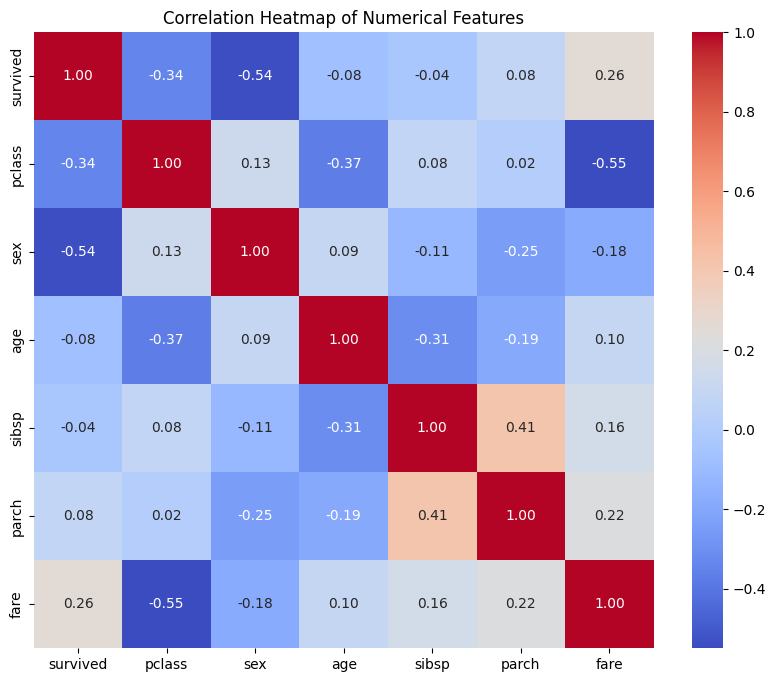

In [101]:
#select only the numerical columns
numerical_features = df.select_dtypes(include=['int64', 'float64'])

#compute the correlation matrix
correlation_matrix = numerical_features.corr()

#Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

### 1.4

In [102]:
extra_columns = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) == 1:
            extra_columns.add(correlation_matrix.columns[j])

#print(extra_columns)
# Drop extra columns from the DataFrame
df.drop(extra_columns, axis=1, inplace=True)

# Display the modified DataFrame
print("DataFrame after removing extra columns:")
df

DataFrame after removing extra columns:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,0,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,0,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,1,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### 1.5

In [103]:
print(df['survived'].value_counts()[1])

342


### 1.6

In [105]:
#age_sex = df[["age", "sex"]]
filter_age_sex = df[df["age"] > 30]
filter_age_sex = filter_age_sex[filter_age_sex["sex"] == 0]
filter_age_sex

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
11,1,1,0,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
15,1,2,0,55.0,0,0,16.0000,S,Second,woman,False,NaN,Southampton,yes,True
18,0,3,0,31.0,1,0,18.0000,S,Third,woman,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,1,1,0,48.0,0,0,25.9292,S,First,woman,False,D,Southampton,yes,True
865,1,2,0,42.0,0,0,13.0000,S,Second,woman,False,NaN,Southampton,yes,True
871,1,1,0,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
879,1,1,0,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False


### 1.7

In [106]:
filter_emb_fare = df[df["fare"] > 100]
filter_emb_fare = filter_emb_fare[(filter_emb_fare['embark_town'] == 'Cherbourg') | (filter_emb_fare['embarked'] == 'C')]
filter_emb_fare

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
31,1,1,0,NaN,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False
118,0,1,1,24.0,0,1,247.5208,C,First,man,True,B,Cherbourg,no,False
195,1,1,0,58.0,0,0,146.5208,C,First,woman,False,B,Cherbourg,yes,True
215,1,1,0,31.0,1,0,113.2750,C,First,woman,False,D,Cherbourg,yes,False
258,1,1,0,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
299,1,1,0,50.0,0,1,247.5208,C,First,woman,False,B,Cherbourg,yes,False
306,1,1,0,NaN,0,0,110.8833,C,First,woman,False,NaN,Cherbourg,yes,True
307,1,1,0,17.0,1,0,108.9000,C,First,woman,False,C,Cherbourg,yes,False
311,1,1,0,18.0,2,2,262.3750,C,First,woman,False,B,Cherbourg,yes,False
319,1,1,0,40.0,1,1,134.5000,C,First,woman,False,E,Cherbourg,yes,False


### 1.8

In [107]:
columns_with_missing_values = df.columns[df.isnull().any()]
print(columns_with_missing_values)
print("\n")
#print(df.isnull().any())
missing_values = df.isnull().sum()
print(missing_values)

Index(['age', 'embarked', 'deck', 'embark_town'], dtype='object')


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


#### Age 
Since age is a numerical feature, we can impute the missing values with the mean or median age of passengers

In [108]:
#Impute missing values for 'age' with the median age
median_age = df['age'].median()
df['age'].fillna(median_age, inplace=True)

C:\Users\Avatar\AppData\Local\Temp\ipykernel_14628\2084798164.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(median_age, inplace=True)


#### Embarked and Embark_town
Both columns represent the port of embarkation, and there are only a few missing values. We can impute these missing values with the most common port of embarkation or also we can completely remove these rows since the number of missing values is small compared to the size of the dataset.

In [109]:
#Impute missing values for 'embarked' and 'embark_town' with the most common value
most_common_embarked = df['embarked'].mode()[0]
most_common_embark_town = df['embark_town'].mode()[0]
df['embarked'].fillna(most_common_embarked, inplace=True)
df['embark_town'].fillna(most_common_embark_town, inplace=True)

C:\Users\Avatar\AppData\Local\Temp\ipykernel_14628\4047855028.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embarked'].fillna(most_common_embarked, inplace=True)
C:\Users\Avatar\AppData\Local\Temp\ipykernel_14628\4047855028.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

#### Deck
The deck column represents the deck where the passenger's cabin was located. There are a significant number of missing values. We can either impute a placeholder value for missing decks or drop the column entirely if it's not deemed essential for analysis.

In [110]:
df.drop('deck', inplace=True, axis=1)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,0,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,0,28.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,1,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


### 1.9

In [111]:
average_age = df['age'].mean()
print(average_age)

males_ages = df[df["sex"] == 1]
average_age_males = males_ages['age'].mean()
#print(males_ages)
print(average_age_males)

females_age = df[df["sex"] == 0]
#print(females_age)
average_age_females = females_age['age'].mean()
print(average_age_females)

29.36158249158249
30.14067590987868
27.929936305732483


### 1.10

In [112]:
# Calculate correlation coefficient
correlation = df['fare'].corr(df['survived'])

print("Correlation coefficient between fare and survival rate:", correlation)

fare_survived = df.groupby('survived')['fare'].describe()
print("\nStatistical summary of fare for each survival status:")
print(fare_survived)

Correlation coefficient between fare and survival rate: 0.2573065223849623

Statistical summary of fare for each survival status:
          count       mean        std  min      25%   50%   75%       max
survived                                                                 
0         549.0  22.117887  31.388207  0.0   7.8542  10.5  26.0  263.0000
1         342.0  48.395408  66.596998  0.0  12.4750  26.0  57.0  512.3292


This positive correlation coefficient indicates a weak positive linear relationship between the fare paid and the likelihood of survival. this relationship is relatively weak.

For passengers who did not survive(0):
- The average fare paid was approximately $22.12. 
- The standard deviation was approximately $31.39.
- Fares ranged from $0 to $263, with the majority falling below $26.

For passengers who survived (1):
- The average fare paid was higher, approximately $48.40.
- The standard deviation was also higher, approximately $66.60.
- Fares ranged from $0 to $512.33, with the majority falling below $57.

Overall, this suggests that passengers who paid higher fares were more likely to survive, but the relationship is not very strong, and there are exceptions. Other factors likely played a role in determining survival rates as well.

### 1.11

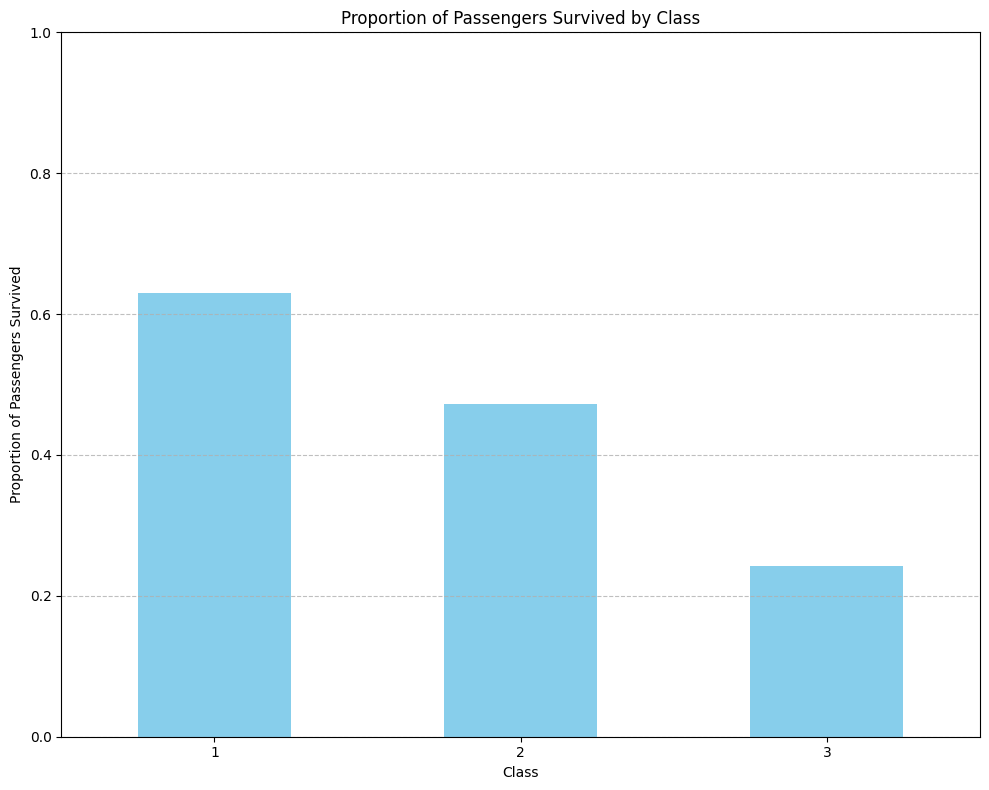

In [113]:
survived_by_class = df.groupby('pclass')['survived'].mean()

plt.figure(figsize=(10, 8))
survived_by_class.plot(kind='bar', color='skyblue')
plt.title('Proportion of Passengers Survived by Class')
plt.xlabel('Class')
plt.ylabel('Proportion of Passengers Survived')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

### 1.12

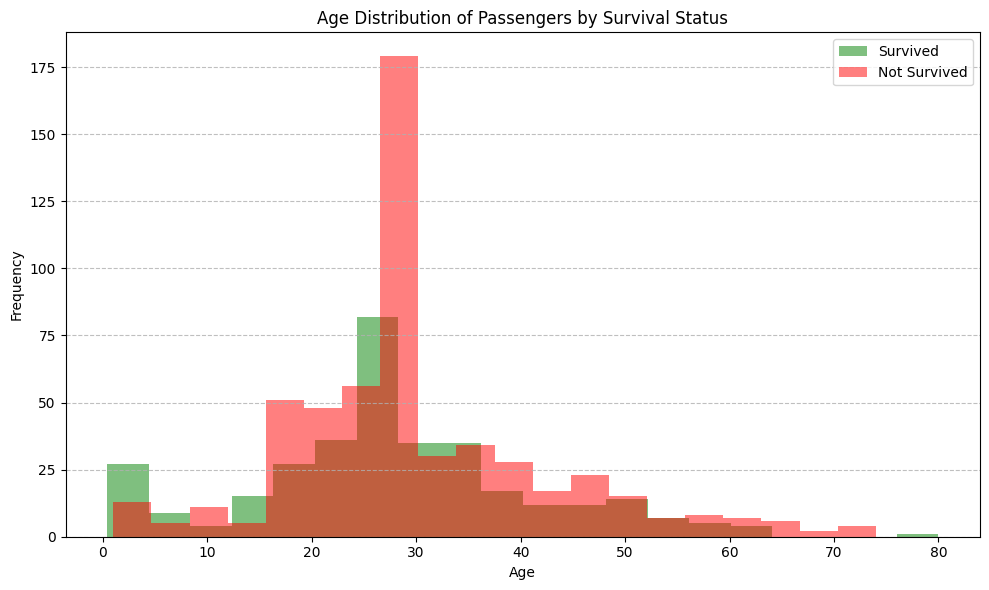

In [114]:
survived = df[df['survived'] == 1]['age']
not_survived = df[df['survived'] == 0]['age']

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(survived, bins=20, alpha=0.5, color='green', label='Survived')
plt.hist(not_survived, bins=20, alpha=0.5, color='red', label='Not Survived')
plt.title('Age Distribution of Passengers by Survival Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

### 1.13

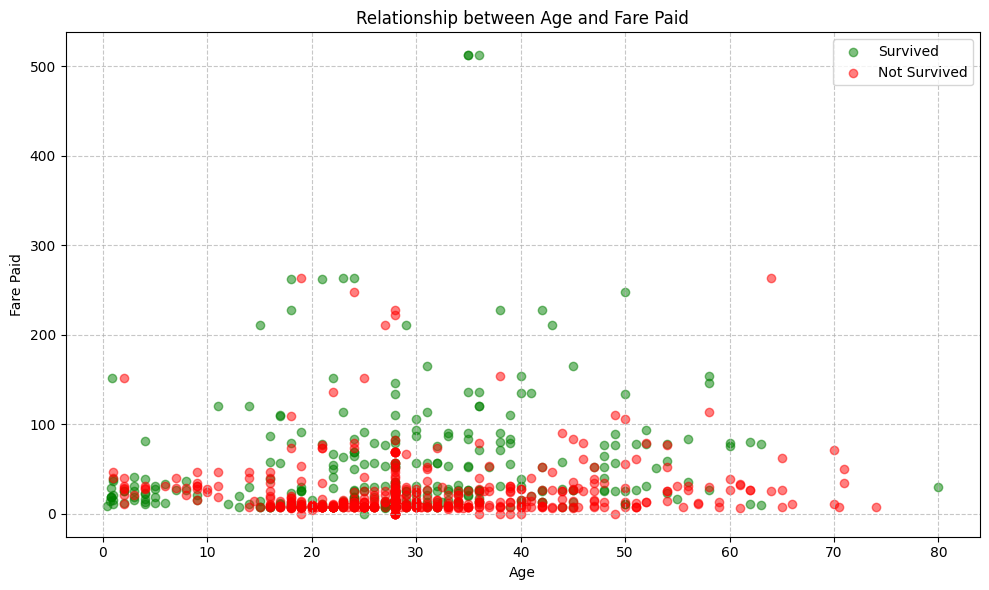

In [115]:
plt.figure(figsize=(10, 6))
plt.scatter(df[df['survived'] == 1]['age'], df[df['survived'] == 1]['fare'], color='green', label='Survived', alpha=0.5)
plt.scatter(df[df['survived'] == 0]['age'], df[df['survived'] == 0]['fare'], color='red', label='Not Survived', alpha=0.5)
plt.title('Relationship between Age and Fare Paid') #(Color-coded by Survival)
plt.xlabel('Age')
plt.ylabel('Fare Paid')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 1.14

In [116]:
pivot_table = df.pivot_table(index=['pclass', 'sex'],
                             values=['fare', 'survived'],
                             aggfunc={'fare': 'mean', 'survived': 'mean'})

print(pivot_table)

                  fare  survived
pclass sex                      
1      0    106.125798  0.968085
       1     67.226127  0.368852
2      0     21.970121  0.921053
       1     19.741782  0.157407
3      0     16.118810  0.500000
       1     12.661633  0.135447


### 1.15

<Figure size 1000x600 with 0 Axes>

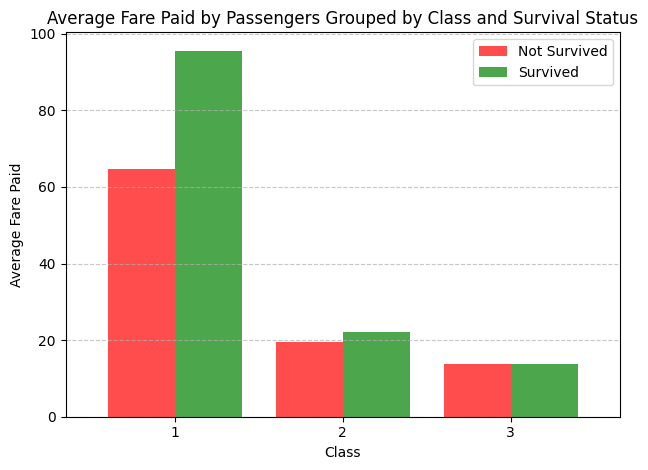

In [117]:
grouped_data = df.groupby(['pclass', 'survived'])['fare'].mean().unstack()

plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', width=0.8, color=['red', 'green'], alpha=0.7)
plt.title('Average Fare Paid by Passengers Grouped by Class and Survival Status')
plt.xlabel('Class')
plt.ylabel('Average Fare Paid')
plt.xticks(rotation=0)
plt.legend(['Not Survived', 'Survived'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Task 2

In [68]:
df2 = pd.read_csv('task2.csv')
df2.head()

,Work_Year,Experience_Level,Employment_Type,Job_Title,Salary,Salary_Currency,Remote_Ratio,Company_Size
0,2024,Senior-Level,Full-Time,AI Engineer,90000,USD,0,Large
1,2024,Senior-Level,Full-Time,Machine Learning Engineer,180500,USD,0,Medium
2,2024,Senior-Level,Full-Time,Machine Learning Engineer,96200,USD,0,Medium
3,2024,Senior-Level,Full-Time,Machine Learning Engineer,235000,USD,0,Medium
4,2024,Senior-Level,Full-Time,Machine Learning Engineer,175000,USD,0,Medium


Checking for null values

In [69]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13972 entries, 0 to 13971
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Work_Year         13972 non-null  int64 
 1   Experience_Level  13972 non-null  object
 2   Employment_Type   13972 non-null  object
 3   Job_Title         13972 non-null  object
 4   Salary            13972 non-null  int64 
 5   Salary_Currency   13972 non-null  object
 6   Remote_Ratio      13972 non-null  int64 
 7   Company_Size      13972 non-null  object
dtypes: int64(3), object(5)
memory usage: 873.4+ KB


In [70]:
df2.describe()

,Work_Year,Salary,Remote_Ratio
count,13972.000000,1.397200e+04,13972.000000
mean,2023.085600,1.660011e+05,33.334526
std,0.687612,3.661545e+05,46.682931
min,2020.000000,1.400000e+04,0.000000
25%,2023.000000,1.040000e+05,0.000000
50%,2023.000000,1.422000e+05,0.000000
75%,2024.000000,1.880000e+05,100.000000
max,2024.000000,3.040000e+07,100.000000


Finding currencies that have been repeated more than 10 times in the dataset

In [71]:
## currencies that have been repeated more than 10 times
value_counts = df2['Salary_Currency'].value_counts()
value_counts

Salary_Currency
USD    12876
GBP      522
EUR      414
INR       52
CAD       49
AUD       12
PLN        7
CHF        6
SGD        6
JPY        4
BRL        4
DKK        3
HUF        3
TRY        3
NOK        2
THB        2
ZAR        1
HKD        1
ILS        1
PHP        1
NZD        1
MXN        1
CLP        1
Name: count, dtype: int64

In [72]:
df2 = df2[df2['Salary_Currency'].isin(value_counts.index[value_counts > 10])]
df2.shape

(13925, 8)

Standardizing all currencies and converting them to USD

In [73]:
conversion_dict = {'GBP':1.26,
                   'EUR':1.08,
                   'INR':0.012,
                   'CAD':0.74,
                   'AUD':0.66}

In [74]:
def convert_to_usd(row):
  currency = row['Salary_Currency']
  value = row['Salary']
  rate = conversion_dict.get(currency, 1)  
  return value * rate

df2['Standard_Salary'] = df2.apply(convert_to_usd, axis=1)
df2.head()

,Work_Year,Experience_Level,Employment_Type,Job_Title,Salary,Salary_Currency,Remote_Ratio,Company_Size,Standard_Salary
0,2024,Senior-Level,Full-Time,AI Engineer,90000,USD,0,Large,90000.0
1,2024,Senior-Level,Full-Time,Machine Learning Engineer,180500,USD,0,Medium,180500.0
2,2024,Senior-Level,Full-Time,Machine Learning Engineer,96200,USD,0,Medium,96200.0
3,2024,Senior-Level,Full-Time,Machine Learning Engineer,235000,USD,0,Medium,235000.0
4,2024,Senior-Level,Full-Time,Machine Learning Engineer,175000,USD,0,Medium,175000.0


Finding the most popular job titles

In [75]:
popular_title = df2.groupby('Job_Title').size().sort_values(ascending= False)[:10].to_frame(name= 'count').reset_index()
popular_title.head(10)

,Job_Title,count
0,Data Engineer,3012
1,Data Scientist,2859
2,Data Analyst,2076
3,Machine Learning Engineer,1463
4,Research Scientist,441
5,Analytics Engineer,387
6,Applied Scientist,367
7,Data Architect,337
8,Research Engineer,259
9,Business Intelligence Engineer,216


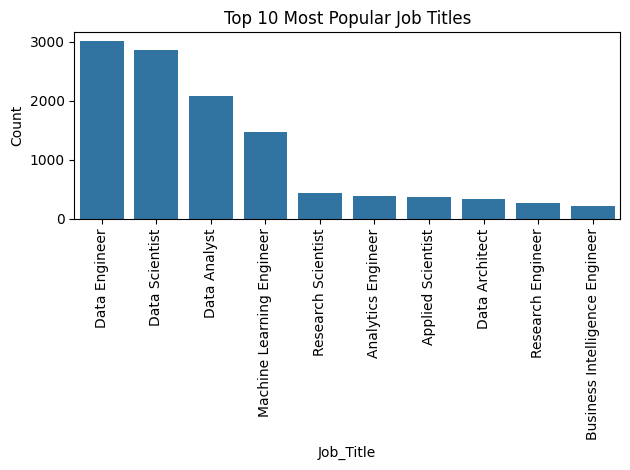

In [76]:
sns.barplot(x = "Job_Title", y = "count", data = popular_title)

# Customize the plot (optional)
plt.xlabel("Job_Title")
plt.ylabel("Count")
plt.title("Top 10 Most Popular Job Titles")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability (optional)
plt.tight_layout()

In [77]:
high_salary = df2.sort_values(by='Standard_Salary',ascending= False)[:10].reset_index()
high_salary['Job_Title'].head(10)

0                  AI Architect
1                  Data Analyst
2                Data Scientist
3                 Data Engineer
4            Analytics Engineer
5    Machine Learning Scientist
6     Machine Learning Engineer
7    Machine Learning Scientist
8    Machine Learning Scientist
9                  Data Analyst
Name: Job_Title, dtype: object

Experience Level Distribution

In [78]:
exp_level = df2.groupby('Experience_Level').size().to_frame(name= 'count').reset_index()
exp_level.head(10)

,Experience_Level,count
0,Entry-Level,1014
1,Executive-Level,402
2,Mid-Level,3270
3,Senior-Level,9239


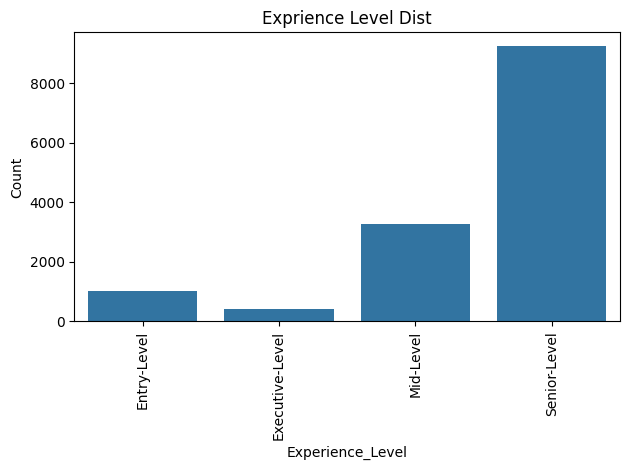

In [79]:
sns.barplot(x = "Experience_Level", y = "count", data = exp_level)

# Customize the plot (optional)
plt.xlabel("Experience_Level")
plt.ylabel("Count")
plt.title("Exprience Level Dist")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability (optional)
plt.tight_layout()

In [80]:
avg_salary_per_exp_level = df2.groupby('Experience_Level')['Standard_Salary'].mean().sort_values(ascending= False).to_frame(name= 'Avg_Salary').reset_index()
avg_salary_per_exp_level

,Experience_Level,Avg_Salary
0,Executive-Level,193346.899005
1,Senior-Level,163660.286835
2,Mid-Level,125594.858196
3,Entry-Level,91685.522734


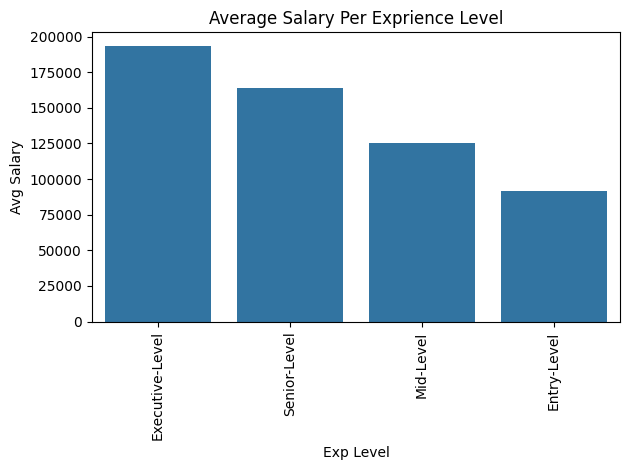

In [81]:
sns.barplot(x = "Experience_Level", y = "Avg_Salary", data = avg_salary_per_exp_level)  # x needs to be datetime format for time series

# Customize the plot (optional)
plt.xlabel("Exp Level")
plt.ylabel("Avg Salary")
plt.title("Average Salary Per Exprience Level")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability (optional)
plt.tight_layout()

In [82]:
avg_salary_per_country = df2.groupby('Salary_Currency')['Standard_Salary'].mean().sort_values(ascending= False).to_frame(name= 'Avg_Salary').reset_index()
avg_salary_per_country

,Salary_Currency,Avg_Salary
0,USD,156575.238273
1,CAD,104072.346531
2,GBP,83317.108966
3,AUD,74965.000000
4,EUR,63334.184348
5,INR,32180.262231


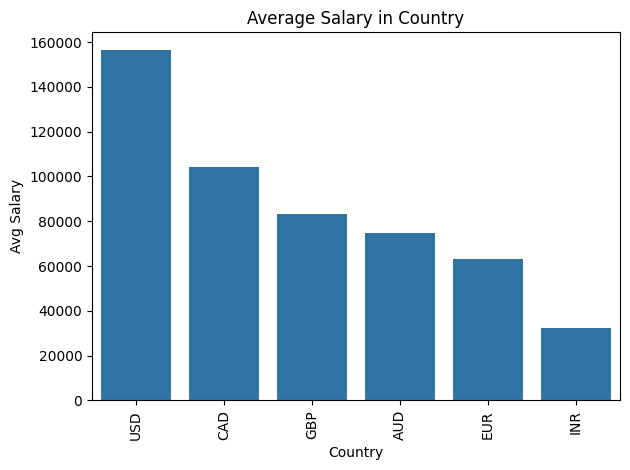

In [83]:
sns.barplot(x = "Salary_Currency", y = "Avg_Salary", data = avg_salary_per_country)  # x needs to be datetime format for time series

# Customize the plot (optional)
plt.xlabel("Country")
plt.ylabel("Avg Salary")
plt.title("Average Salary in Country")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability (optional)
plt.tight_layout()

In [84]:
employment_type = df2.groupby('Employment_Type').size().to_frame(name= 'count').reset_index()
employment_type.head(10)

,Employment_Type,count
0,Contract,25
1,Freelance,12
2,Full-Time,13869
3,Part-Time,19


In [85]:
avg_salary_per_company_size = df2.groupby('Company_Size')['Standard_Salary'].mean().sort_values(ascending= False).to_frame(name= 'Avg_Salary').reset_index()
avg_salary_per_company_size

,Company_Size,Avg_Salary
0,Medium,151818.459537
1,Large,141061.184385
2,S,88227.557783


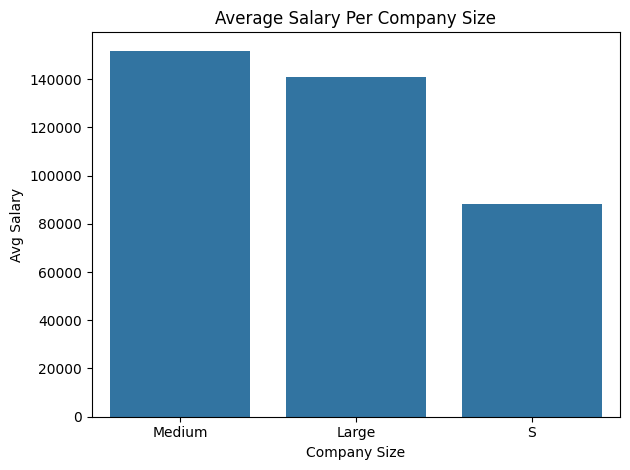

In [86]:
sns.barplot(x = "Company_Size", y = "Avg_Salary", data = avg_salary_per_company_size)  # x needs to be datetime format for time series

# Customize the plot (optional)
plt.xlabel("Company Size")
plt.ylabel("Avg Salary")
plt.title("Average Salary Per Company Size")
plt.xticks(rotation=0)  # Rotate x-axis labels for readability (optional)
plt.tight_layout()